## Importando los datos

In [1]:
''' Definimos la funcion para leer el archivo geneX '''
import re
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line = re.sub('["\n]', '', line)
        col=line.split(',')
        data.append(col)
    return data

Al cargar los datos, la variable geneX tendra en su prmer fila (geneX[0]) los datos de los diferenctes momentos a los cuales se tomo la muestra. Luego en la filas subsiguientes (geneX[n]), el primer elemento corresponde al nombre del gen y los demas a los valores de expresion de dicho gen a cada tiempo.

In [2]:
geneX=ldata('geneX.csv')

In [3]:
geneX[0]

['',
 'at_12_1_A',
 'at_12_2_A',
 'at_12_3_A',
 'at_12_4_A',
 'at_12_5_A',
 'at_12_6_A',
 'at_12_7_A',
 'at_12_8_A',
 'at_12_9_A',
 'at_12_10_A',
 'at_12_11_A',
 'at_12_12_A']

In [4]:
geneX[1]

['AT1G01060',
 '10.3176866362518',
 '7.65600446413793',
 '3.39993568220103',
 '1.30679489632012',
 '5.35534800540555',
 '9.00846891441324',
 '9.88520407950861',
 '7.18594496152195',
 '3.05035783179963',
 '1.70774513716189',
 '5.18535879993122',
 '9.02459455955993']

Asignamos los nombres a una lista y los valores a una matriz de numpy, donde las filas corresponden a cada gen y las columnas a cada tiempo.

In [5]:
import numpy as np
valores_genes=np.zeros((500, 12))
nombre_genes=[]
for j in range(1,501):
    nombre_genes.append(geneX[j][0])
    for i in range(1,13):
        valores_genes[j-1,i-1]=float(geneX[j][i])

In [6]:
nombre_genes[0]

'AT1G01060'

In [7]:
valores_genes[0]

array([ 10.31768664,   7.65600446,   3.39993568,   1.3067949 ,
         5.35534801,   9.00846891,   9.88520408,   7.18594496,
         3.05035783,   1.70774514,   5.1853588 ,   9.02459456])

# EJERCICIO 1

a)MATRIZ DE CORRELACION

In [13]:
S=(np.corrcoef(valores_genes)+1)/2

b)MATRIZ DE ADYACENCIA BINARIZADA

In [36]:
A=np.zeros(np.shape(S))
A[S>0.95]=1

# A = 1*(S>0.95)

c) ...

In [45]:
import igraph as igraph
import networkx as nx
import time

def calculate_infomap(np_adj_list, method="infomap"):
    g = igraph.Graph.Weighted_Adjacency(np_adj_list.tolist(),mode=igraph.ADJ_UPPER)
   
    t0=time.time()
    if method=="infomap":
        labels = g.community_infomap(edge_weights="weight").membership
#    labels = g.community_label_propagation(weights="weight").membership
    if method=="fastgreedy":
        labels = g.community_fastgreedy(weights="weight").as_clustering().membership
          
    print("Duración: {}s".format(time.time()-t0))
           
    return labels

In [127]:
labels_infomap=calculate_infomap(A,method='infomap')
labels_fastg=calculate_infomap(A,method='fastgreedy')

labels=[labels_infomap,labels_fastg]

Duración: 1.3493199348449707s
Duración: 0.012918233871459961s


In [138]:
labels_infomap

[1,
 10,
 0,
 1,
 2,
 0,
 7,
 3,
 14,
 2,
 1,
 3,
 0,
 4,
 0,
 3,
 8,
 21,
 6,
 5,
 7,
 8,
 1,
 12,
 2,
 3,
 0,
 9,
 1,
 2,
 4,
 3,
 5,
 2,
 5,
 11,
 1,
 0,
 0,
 4,
 4,
 3,
 0,
 0,
 1,
 2,
 2,
 13,
 0,
 0,
 8,
 2,
 54,
 4,
 1,
 26,
 0,
 5,
 0,
 4,
 0,
 7,
 3,
 3,
 1,
 0,
 0,
 24,
 0,
 2,
 0,
 2,
 2,
 4,
 0,
 3,
 4,
 4,
 22,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 3,
 2,
 1,
 17,
 1,
 0,
 10,
 27,
 0,
 0,
 7,
 1,
 5,
 0,
 4,
 22,
 5,
 28,
 2,
 8,
 7,
 0,
 1,
 8,
 0,
 0,
 0,
 5,
 7,
 3,
 1,
 1,
 4,
 8,
 17,
 7,
 29,
 2,
 0,
 30,
 7,
 3,
 3,
 2,
 18,
 16,
 1,
 5,
 31,
 0,
 7,
 0,
 0,
 2,
 2,
 0,
 1,
 19,
 2,
 4,
 0,
 5,
 21,
 25,
 20,
 1,
 1,
 23,
 32,
 2,
 4,
 10,
 0,
 5,
 8,
 10,
 2,
 0,
 1,
 5,
 1,
 3,
 4,
 33,
 10,
 2,
 2,
 0,
 24,
 34,
 0,
 17,
 1,
 5,
 13,
 2,
 11,
 35,
 1,
 3,
 2,
 3,
 4,
 9,
 1,
 0,
 1,
 0,
 8,
 1,
 6,
 2,
 11,
 18,
 0,
 8,
 5,
 0,
 5,
 3,
 2,
 2,
 5,
 0,
 11,
 36,
 2,
 25,
 37,
 2,
 8,
 1,
 7,
 6,
 9,
 9,
 9,
 9,
 18,
 1,
 1,
 6,
 8,
 9,
 5,
 1,
 2,
 1,
 2,
 1,


Modularity

In [48]:
from __future__ import division

from functools import wraps
from itertools import product

import networkx as nx
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

__all__ = ['coverage', 'modularity', 'performance']

class NotAPartition(NetworkXError):
    """Raised if a given collection is not a partition.

    """

    def __init__(self, G, collection):
        msg = '{} is not a valid partition of the graph {}'
        msg = msg.format(G, collection)
        super(NotAPartition, self).__init__(msg)


def modularity(G, communities, weight='weight'):
    
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

Necesito el grafo y las comunidades:

In [54]:
G=nx.from_numpy_matrix(A)
H=nx.from_numpy_matrix(A)


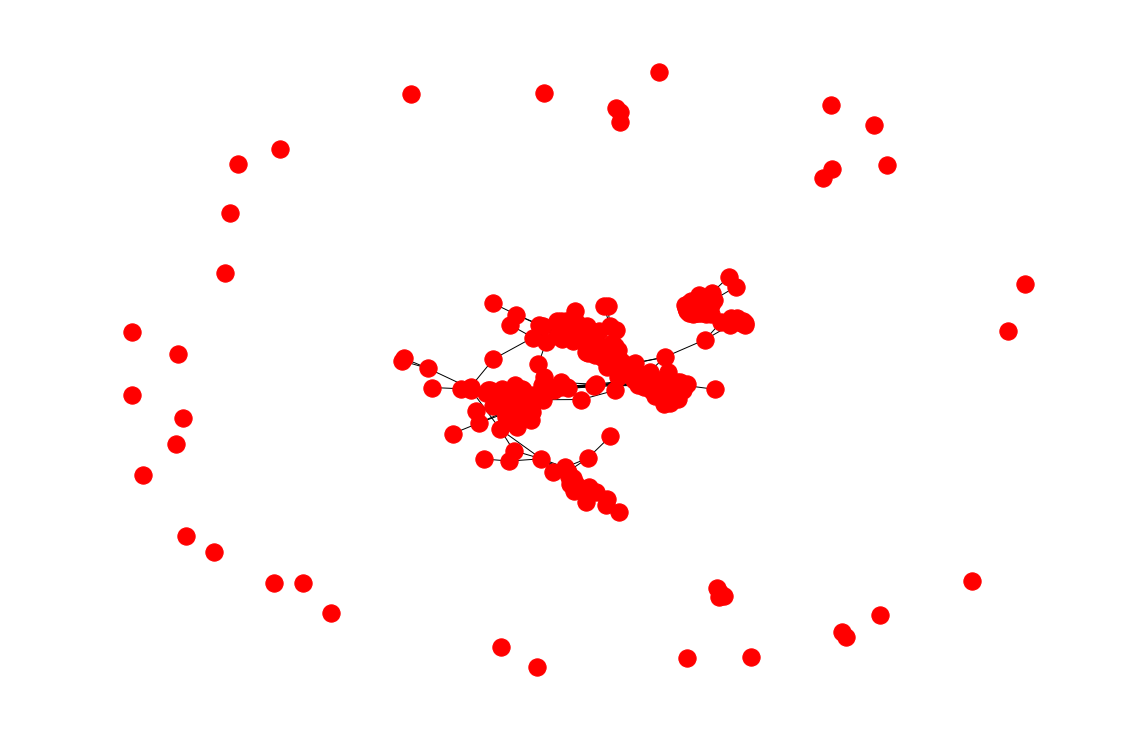

In [66]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,10))
nx.draw_spring(G)
plt.show()

Asignamos los nombres a los nodos

In [ ]:
dict_nombres=dict(zip(list(G.nodes()),nombre_genes))
nx.relabel_nodes(G,dict_nombres,copy=False)

dict_comun_infomap=dict(zip(list(G.nodes()),labels_infomap))
dict_comun_fastg=dict(zip(list(G.nodes()),labels_fastg))



In [123]:
comunidades=[dict_comun_infomap,dict_comun_fastg]

In [124]:
def AssingCommunities(G,comunidades): #comunidades=lista de diccionarios de comunidades
    for n in G.nodes():
        G.nodes[n]['comunidad_info']=comunidades[0][n]
        G.nodes[n]['comunidad_fast']=comunidades[1][n]
        

In [126]:
AssingCommunities(G,comunidades)

In [129]:
name_coms=['comunidad_info','comunidad_fast']

def Communities(G,labels): #laabels=lista de labels de comunidades
    Communities=[]
    for k in range(len(labels)):
        nodos_por_comunidad=[]
        for i in range(len(set(labels[k]))):
            nodos=[]
            for j in range(len(list(G.nodes()))):
                if i==list(nx.get_node_attributes(G,name_coms[k]).items())[j][1]:
                    nodos.append(list(G.nodes())[j])
            nodos_por_comunidad.append(nodos)
        Communities.append(nodos_por_comunidad)
    return(Communities)

In [121]:
modularity(G,nodos_por_comunidad)

0.7028054453895043

In [130]:
Communities=Communities(G,labels)

In [133]:
mod_infomap=modularity(G,Communities[0])
mod_fastg=modularity(G,Communities[1])

GRAFICO POR COMUNIDADES

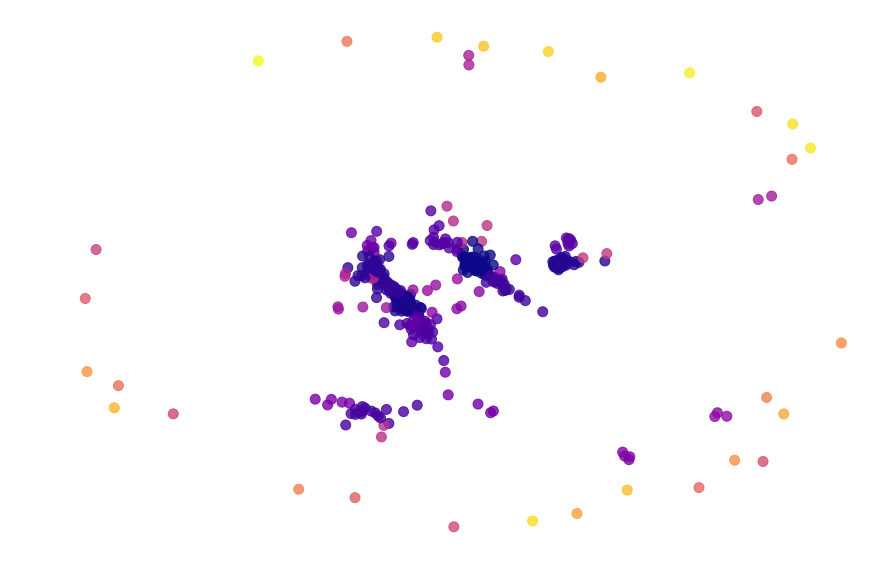

In [137]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G) 
        
nx.draw_networkx_nodes(G,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(dict(nx.get_node_attributes(G,name_coms[0])).values()),
                       node_size=100,
                       alpha=0.8)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#networkx.draw_networkx_edges(g,pos,width=width,alpha=0.8,edge_color=edge_color, cmap=plt.get_cmap("Greens"))#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

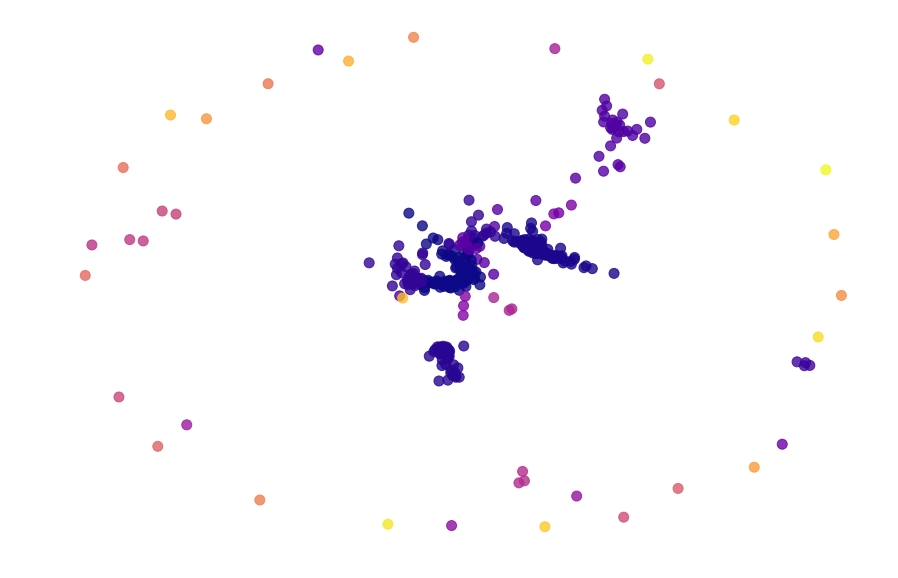

In [139]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G) 
        
nx.draw_networkx_nodes(G,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(dict(nx.get_node_attributes(G,name_coms[1])).values()),
                       node_size=100,
                       alpha=0.8)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#networkx.draw_networkx_edges(g,pos,width=width,alpha=0.8,edge_color=edge_color, cmap=plt.get_cmap("Greens"))#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

EJERCICIO 2

Algunos paquetes que les pueden serivr para hacer el dendograma: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [ ]:
# For dendogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist